In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import itertools as it
from random import randint
import time

In [23]:
# math functions
def dist(node1, node2):
  xDifSq = node1.point[0]-node2.point[0]
  yDifSq = node1.point[1]-node2.point[1]
  xDifSq = math.pow(xDifSq,2)
  yDifSq = math.pow(yDifSq,2)
  return math.sqrt(xDifSq + yDifSq)

def engine(num):
  if num == 1:
    return 1
  return num * engine(num-1)

# functions to count complexity 
def teoAprox(i, c):
  sum = 0
  for k in range(0,i):
    sum+=(i-k)*(k+1)
  return sum*c

def teoAprox2(i, c):
  return ((i*i+i)/2) * math.log(i,2) * c


def teoBrut(i, c):
  return engine(i) *c/i

def timTeoAprox(start=2, stop=5, c=1):
  x = []
  y = []
  for i in range(start, stop+1):
    x.append(float(i))
    y.append(teoAprox(i,c))
  return [x,y]

def timTeoAprox2(start=2, stop=5, c=1):
  x = []
  y = []
  for i in range(start, stop+1):
    x.append(float(i))
    y.append(teoAprox2(i,c))
  return [x,y]

def timTeoBrut(start=2, stop=5, c=1):
  x = []
  y = []
  for i in range(start, stop+1):
    x.append(float(i))
    y.append(teoBrut(i,c))
  return [x,y]

In [24]:
# classes used in algoritm

class Node:
  def __init__(self, x, y):
      self.point = [x,y]

In [25]:
class Graph:
  def __init__(self, array):
    self.nodes = array

  def addNodes(self, node):
    self.nodes = np.append(self.nodes, node)

  def removeNode(self, node):
    self.nodes = np.delete(self.nodes, node)

  def plotGraph(self, color='orange'):
      xCoord = []
      yCoord = []
      for node in self.nodes:
        xCoord.append(node.point[0])
        yCoord.append(node.point[1]) 
      plt.grid(True)
      plt.scatter(xCoord,yCoord,color=color)

In [26]:
class Hamilton(Graph):
  def __init__(self, graph):
    self.nodes = graph.nodes
    self.addNodes(graph.nodes[0])
    self.distance = 0;
    numElements = len(self.nodes)
    for i in range(1,numElements):
      self.distance += dist(self.nodes[i], self.nodes[(i-1)])

  def plotHamilton(self, col = 'blue'):
      xCoord = []
      yCoord = []
      for node in self.nodes:
        xCoord.append(node.point[0])
        yCoord.append(node.point[1]) 
      plt.grid(True)
      plt.plot(xCoord,yCoord,color=col, linestyle='dashed')
      self.plotGraph()

In [27]:
# brutforce algoritm
def brutForceTSP(graph):
  permOfNodes = list(it.permutations(graph.nodes))
  permOfNodes = np.array(permOfNodes)
  minHamilton = Hamilton(Graph(permOfNodes[0]))
  for i in permOfNodes:
    if i[0] != graph.nodes[0]:
      return minHamilton 
    actualHamilton = Hamilton(Graph(i))   
    if actualHamilton.distance < minHamilton.distance:
      minHamilton = actualHamilton
  return minHamilton

In [28]:
def brutForceTSPplotAll(graph):
  permOfNodes = list(it.permutations(graph.nodes))
  permOfNodes = np.array(permOfNodes)
  minHamilton = Hamilton(Graph(permOfNodes[0]))
  minHamilton.plotHamilton('green')
  plt.show()
  for i in permOfNodes:
    if i[0] != graph.nodes[0]:
      return minHamilton 
    actualHamilton = Hamilton(Graph(i)) 
    if actualHamilton.distance <= minHamilton.distance:
      minHamilton = actualHamilton
      plt.clf()
      minHamilton.plotHamilton('green')
      plt.show() 
    else:
      plt.clf()
      actualHamilton.plotHamilton('red')
      plt.show() 
  return minHamilton

In [29]:
def brutForceTSPplotNewBest(graph):
  permOfNodes = list(it.permutations(graph.nodes))
  permOfNodes = np.array(permOfNodes)
  minHamilton = Hamilton(Graph(permOfNodes[0]))
  minHamilton.plotHamilton('green')
  plt.show()
  for i in permOfNodes:
    if i[0] != graph.nodes[0]:
      return minHamilton 
    actualHamilton = Hamilton(Graph(i)) 
    if actualHamilton.distance < minHamilton.distance:
      minHamilton = actualHamilton
      plt.clf()
      minHamilton.plotHamilton('green')
      plt.show() 
  return minHamilton

In [30]:
# graph generator
def generateGraph(numOfNodes = 5, minX = 0, maxX = 100, minY = 0, maxY = 100):
  g = Graph(np.empty(0))
  for i in range(0, numOfNodes):
    x = randint(minX, maxX)
    y = randint(minY, maxY)
    g.addNodes(Node(x,y))
  return g 

In [31]:
# function to reaserh tiime of algoritm
def timeBrutal(sample = 5, start=2, stop=5):
  solutionX = []
  solutionY = []
  for i in range(start, stop+1):
    summary = 0
    for k in range(0,sample):
      t0 = time.clock()
      g = generateGraph(i)
      h = brutForceTSP(g)
      t1 = time.clock()
      summary = summary + (t1-t0)
    avg = summary/sample
    solutionX.append(i)
    solutionY.append(avg)
  return [solutionX,solutionY]

In [32]:
def timeApprox(sample = 5, start=2, stop=5):
  solutionX = []
  solutionY = []
  for i in range(start, stop+1):
    summary = 0
    for k in range(0,sample):
      t0 = time.clock()
      g = generateGraph(i)
      h = approxTSP(g)
      t1 = time.clock()
      summary = summary + (t1-t0)
    avg = summary/sample
    solutionX.append(i)
    solutionY.append(avg)
  return [solutionX,solutionY]

In [33]:
class treeNode:
  def __init__(self, root, key = 0):
    self.key = key
    self.root = root
    self.childs = []

  def addLink(self, node):
    self.childs.append(node)
  
  def plotTree(self, color="blue", it=True):
    for i in self.childs:
      plt.plot([self.root.point[0],i.root.point[0]],[self.root.point[1],i.root.point[1]], color=color)
      plt.scatter([self.root.point[0],i.root.point[0]],[self.root.point[1],i.root.point[1]], color=color)
      i.plotTree(color=color,it=False)
    if it == True:
      plt.scatter([self.root.point[0]],[self.root.point[1]], color="blue")
      plt.show()
      
  def preorder(self):
    array = np.array(self.root)
    for i in self.childs:
      array = np.append(array,i.preorder())
    return array

In [34]:
def adjacencyMatrix(graph = generateGraph(5)):
  matrix = []
  for i in graph.nodes:
    adjNode = []
    for j in graph.nodes:
      adjNode.append(dist(i,j))
    matrix.append(adjNode)
  return matrix    

In [35]:
def mstPrim(graph = generateGraph(5)):
  INF = 9999999
  N = len(graph.nodes)

  G = adjacencyMatrix(graph)

  selected_node = []
  nodes = []
  for i in range(0,N):
    selected_node.append(0)
    nodes.append(treeNode(graph.nodes[i],i))

  no_edge = 0
  selected_node[0] = True

  while (no_edge < N - 1):
      
      minimum = INF
      a = 0
      b = 0
      for m in range(N):
          if selected_node[m]:
              for n in range(N):
                  if ((not selected_node[n]) and G[m][n]):  
                      if minimum > G[m][n]:
                          minimum = G[m][n]
                          a = m
                          b = n
      nodes[a].addLink(nodes[b])
      selected_node[b] = True
      no_edge += 1

  return nodes[0]

In [36]:
for i in adjacencyMatrix():
  print(i)

[0.0, 37.69615364994153, 30.675723300355934, 36.22154055254967, 18.973665961010276]
[37.69615364994153, 0.0, 68.35202996254024, 71.7007670809734, 52.009614495783374]
[30.675723300355934, 68.35202996254024, 0.0, 15.652475842498529, 24.351591323771842]
[36.22154055254967, 71.7007670809734, 15.652475842498529, 0.0, 37.20215047547655]
[18.973665961010276, 52.009614495783374, 24.351591323771842, 37.20215047547655, 0.0]


In [37]:
def approxTSP(graph = generateGraph(5)):
  mstTree = mstPrim(graph)
  nodes = mstTree.preorder()
  hamilton = Hamilton(Graph(nodes))
  return hamilton

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


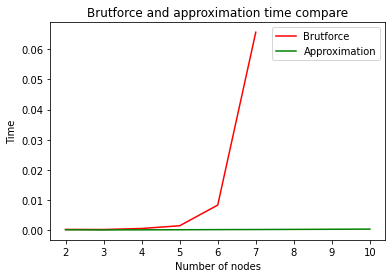

In [38]:
# difference between brutal and aprox algoritm
timBrutal = timeBrutal(stop = 7, sample=5)
timApprox = timeApprox(stop = 10, sample=5)
plt.plot(timBrutal[0], timBrutal[1], color="red", label="Brutforce")
plt.plot(timApprox[0], timApprox[1], color="green", label="Approximation")
plt.xlabel("Number of nodes")
plt.ylabel("Time")
plt.title("Brutforce and approximation time compare")
plt.legend();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


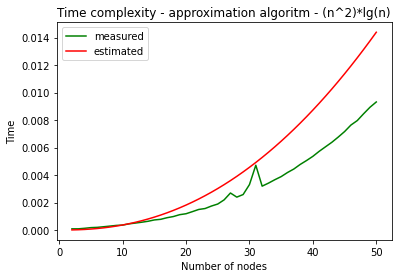

In [39]:
# extimated and measured values (aprox)
timApprox = timeApprox(stop = 50, sample=500)
teorApprox2 = timTeoAprox2(stop = 50, c=0.000002)
plt.plot(timApprox[0], timApprox[1], color="green", label="measured")
plt.plot(teorApprox2[0], teorApprox2[1], color="red", label="estimated")
plt.xlabel("Number of nodes")
plt.ylabel("Time")
plt.title("Time complexity - approximation algoritm - (n^2)*lg(n)")
plt.legend();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


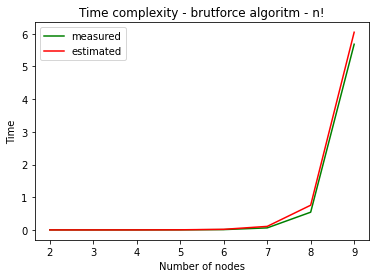

In [40]:
# extimated and measured values (brutal)
timBrut = timeBrutal(stop = 9, sample=1)
teorBrut = timTeoBrut(stop = 9, c=0.00015)
plt.plot(timBrut[0], timBrut[1], color="green", label="measured")
plt.plot(teorBrut[0], teorBrut[1], color="red", label="estimated")
plt.xlabel("Number of nodes")
plt.ylabel("Time")
plt.title("Time complexity - brutforce algoritm - n!")
plt.legend();

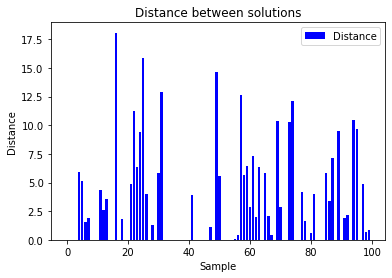

In [56]:
# distance between aprox and accurate solutions
x = []
yB = []
yA = []
ydist = []
avg = 0
n = 100
accurate = 0
for i in range(0,n):
  g = generateGraph(5)
  ha = approxTSP(g)
  hb = brutForceTSP(g) 
  x.append(i)
  yB.append(hb.distance)
  yA.append(ha.distance)
  ydist.append((ha.distance - hb.distance) * 100 / ha.distance)
  if ydist[i] == 0:
    accurate += 1
  avg += (ha.distance - hb.distance) * 100 / ha.distance
avg /= n
#plt.scatter(x, yB, color="green", label="Accurate")
#plt.scatter(x, yA, color="red", label="Approximate")
plt.bar(x,ydist, color="blue", label="Distance")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.title("Distance between solutions")
plt.legend()

  

No handles with labels found to put in legend.


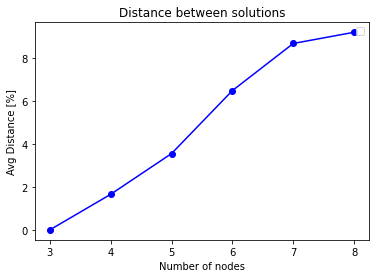

No handles with labels found to put in legend.


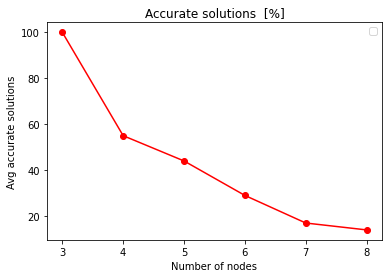

In [42]:
x = []
ydist = []
av = []
ac = []
avg = 0
n = 100
for k in range(3,9):
    accurate = 0
    for i in range(0,n):
      g = generateGraph(k, 0, 100, 0, 100)
      ha = approxTSP(g)
      hb = brutForceTSP(g) 
      if round(ha.distance,3) == round(hb.distance,3):
        accurate += 1
      avg += (ha.distance - hb.distance) * 100 / ha.distance
    avg /= n
    av.append(avg)
    ac.append(accurate)
    x.append(k)

plt.plot(x,av, color="blue")
plt.scatter(x,av, color="blue")
plt.ylabel("Avg Distance [%]")
plt.xlabel("Number of nodes")
plt.title("Distance between solutions")
plt.legend()
plt.show()
plt.clf()
plt.plot(x,ac, color="red")
plt.scatter(x,ac, color="red")
plt.ylabel("Avg accurate solutions")
plt.xlabel("Number of nodes")
plt.title("Accurate solutions  [%]")
plt.legend()
plt.show()  

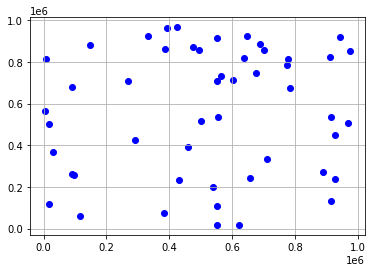

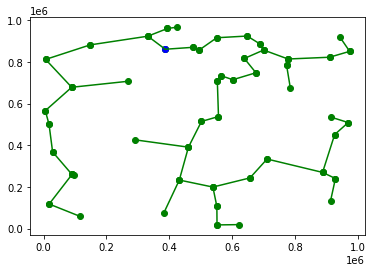

7795347.722149246


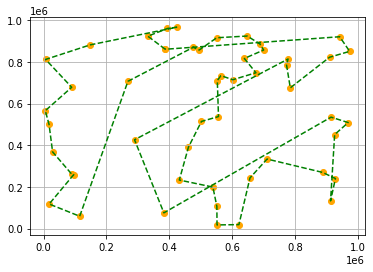

In [62]:
g = generateGraph(50, 0, 1000000, 0 , 1000000)
h2 = approxTSP(g)
g.plotGraph("blue")
plt.show()
root = mstPrim(g)
root.plotTree(color="green")
h2.plotHamilton('green')
print(h2.distance)

220.54156093493125


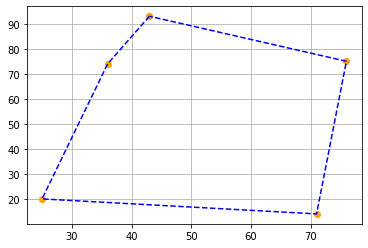

In [44]:
h1 = brutForceTSP(g)
h1.plotHamilton('blue')
print(h1.distance)

In [45]:
max = 0.0
for i in range(0,100):
  g = generateGraph(5)
  h1 = brutForceTSP(g)
  h2 = approxTSP(g)
  if max < (h2.distance/h1.distance):
    max = (h2.distance/h1.distance)
print(max)

1.1865005015753247


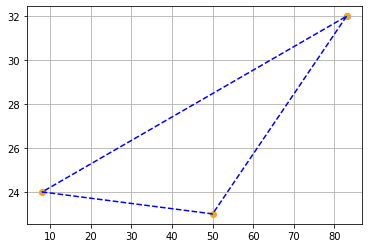

In [46]:
approxTSP(generateGraph(3)).plotHamilton()